In [1]:
import os, mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

In [8]:
print(X.shape)

(1000, 3)


In [13]:
print(X[:10])

[[ 56  18  27]
 [ 81  57   3]
 [ 25   9  11]
 [ 20  13  30]
 [ 27  13  13]
 [ 18  46   7]
 [ 12   3   1]
 [ 21  20   2]
 [109   1   6]
 [  7  55  41]]


In [10]:
#let's look at the count of each value

In [11]:
print(np.bincount(X[:,0]))

[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


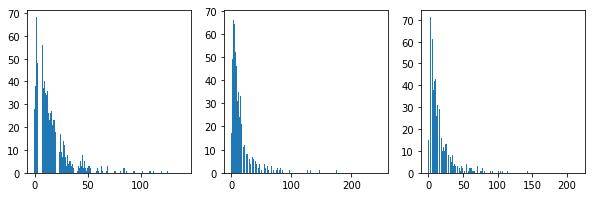

In [34]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
bins=np.bincount(X[:,0])
axes[0].bar(range(len(bins)),bins)
bins=np.bincount(X[:,1])
axes[1].bar(range(len(bins)),bins)
bins=np.bincount(X[:,2])
axes[2].bar(range(len(bins)),bins)
plt.show()

In [38]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test=train_test_split(X,y)

rid=Ridge().fit(X_train,y_train)
print(rid.score(X_train,y_train))
print(rid.score(X_test,y_test))

0.643431250539
0.668084618888


In [40]:
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)

rid=Ridge().fit(X_train_log,y_train)
print(rid.score(X_train_log,y_train))
print(rid.score(X_test_log,y_test))

0.862784152048
0.87542689417


In [41]:
#these transformations should be effective on linear models, but less useful for models such as RF